# Part I - (201902 FORD-GO-BIKE DATASET)
## by Ighoruemuse Omojevwe Rachael

## Introduction
> Ford GoBike, the San Francisco Bay Area’s new regional bike share network, is a public-private partnership between the Metropolitan Transportation Commission and Motivate. Motivate, the global leader in bike share, operates tens of thousands of bikes across four continents. Ford Motor Company is the program’s title partner, whose support enables Ford GoBike to bring the myriad public benefits of state-of-the-art bike share to San Francisco, San Jose, Oakland, Berkeley and Emeryville — at no cost to taxpayers for capital or operational expenditures.
 This data set includes information about individual rides made in this bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [4]:
# shape
df.shape

(183412, 16)

In [5]:
# datatypes
print(df.dtypes)

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [6]:
# describe the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [7]:
# checking for missing values
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [8]:
# checking for duplicated values
sum(df.duplicated())

0

In [9]:
# checking for number of unique values in each column
df.nunique()

duration_sec                 4752
start_time                 183401
end_time                   183397
start_station_id              329
start_station_name            329
start_station_latitude        334
start_station_longitude       335
end_station_id                329
end_station_name              329
end_station_latitude          335
end_station_longitude         335
bike_id                      4646
user_type                       2
member_birth_year              75
member_gender                   3
bike_share_for_all_trip         2
dtype: int64

### Structure of the dataset

> The dataset has 183412 observations with 16 features of bike trips. The features included are: trip duration(in sec), start_time, end_time, station informations(start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude and end_station_longitude), informations on members(bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

### Main feature(s) of interest

> The Trip duration might be the main feature of interest of this dataset, as it does affects the revenue of the company, therefore I will also study the effect of other factors like user_type, trip start and end times, gender and age on the trip duration. Furthermore, i'll explore how riding on different days of the week relate to each rider's characteristics i.e the user type, gender and age to understand how they use the bike sharing service and what it's been used for.



### Features in the dataset that will help support the investigation into the feature(s) of interest

* How does the trip duration differ by user_type, age, hour, and day?
* How does gender and age of the users have an effect on the trip duration?
* When are most trips taken during time of day, day of the week, or month of the year?
* What does the distribution of trip duration look like?
* Which day has the highest demand on trips?
* Which hour(s) during the day has the highest demand on trips?

# DATA WRANGLING PROCESS

### Tasks
* Missing values
* Invalid datatypes
* Extract hour, day from start time and end time
* Extract age from birth year

##### Dealing with missing values

In [10]:
# since there are no replacement values for the missing stations IDs or names, it's better we remove them. Also it's better to remove the null values of the members birth year and members gender, as there are 8265 missing observations which is less than 5% of the whole dataset making it unimportant.
df = df[(df['start_station_id'].isnull() == False) & (df['start_station_name'].isnull() == False) \
   & (df['member_birth_year'].isnull() == False) & (df['member_gender'].isnull() == False)]

In [11]:
# checkng the null values after the dropping.
df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [12]:
# checking the new shape of the dataframe.
df.shape

(174952, 16)

##### Invalid Datatypes

In [13]:
# checking the data type of each column of the dataset
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

In [14]:
# converting the start_time and end_time to datetime type format
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [15]:
# change the user_type data to category data
df['user_type'] = df['user_type'].astype('category')

In [16]:
# change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

In [17]:
# change the start_station_id, end_station_id and bike_id to object data type
df['start_station_id'] = df['start_station_id'].astype('object')
df['end_station_id'] = df['end_station_id'].astype('object')
df['bike_id'] = df['bike_id'].astype('object')

In [18]:
#checking dtypes 
df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                   object
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                     object
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                            object
user_type                        category
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip              bool
dtype: object

##### Extracting hour and day from start time

In [19]:
# Extract start_time_month and day of week from the start_time
df['start_time_dayofweek']= df['start_time'].dt.strftime('%a')
df['start_time_month'] = df['start_time'].dt.strftime('%B')

##### Extracting hour and day from end time

In [20]:
# Extract end_time_month and day of week from end_time
df['end_time_dayofweek']= df['end_time'].dt.strftime('%a')
df['end_time_month'] = df['end_time'].dt.strftime('%B')

In [21]:
# For better understanding of the dataset(trip duration), change the duration in seconds to minutes(min)
df['duration_min'] = df['duration_sec'] / 60

In [22]:
# let's have a look on the distrubtion of the duration_min
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

In [23]:
# Looks like for at least 75% of the data are less than one hour, so end_time_hour will not be important. Extract Start_time_hourfrom start_time information
df['start_time_hour']= df['start_time'].dt.hour

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
start_time_dayofweek       174952 non-null object
start_time_month   

In [25]:
# Notice that the start_time_dayofweek is object type. For better analysis, convert it to Category datatype
weekdays = ['Fri','Sat','Sun','Mon','Tue','Wed','Thu']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df['start_time_dayofweek'] = df['start_time_dayofweek'].astype(ordered_weekdays)

In [26]:
# checking the unique values of the start_time_month
df['start_time_month'].unique()

array(['February'], dtype=object)

In [27]:
# The timestamp proves of the fact that all trips record for this dataset happended at February as the unique values given above
df['start_time'].max() , df['start_time'].min()

(Timestamp('2019-02-28 23:59:18.548000'),
 Timestamp('2019-02-01 00:00:20.636000'))

In [28]:
# There's no need for the duration_sec column
df= df.drop('duration_sec' , axis = 1)

In [29]:
# Birth Year column is not important data to analyze, but we can get the age from this column to study the relationship of the member's age with the duration time and other factors, we will use 2019 to calculate the member's age as this data is from the 2019 dataset.
df['member_age'] = 2019 - df['member_birth_year']

In [30]:
# Changing the dtype of both member_birth_year and member_age to int datatype.
df['member_age'] = df['member_age'].astype(int)
df['member_birth_year'] = df['member_birth_year'].astype(int)

In [31]:
# Checking All the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null bool
start_time_dayofweek       174952 non-null category
start_time_month           174952 non-null object
end_time_dayofweek

In [32]:
df.sample(5)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_month,end_time_dayofweek,end_time_month,duration_min,start_time_hour,member_age
170916,2019-02-04 07:24:58.309,2019-02-04 07:31:18.956,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,350,8th St at Brannan St,37.771431,-122.405787,...,1995,Female,False,Mon,February,Mon,February,6.333333,7,24
178306,2019-02-01 17:26:47.278,2019-02-01 17:33:35.337,368,Myrtle St at Polk St,37.785434,-122.419622,58,Market St at 10th St,37.776619,-122.417385,...,2000,Male,False,Fri,February,Fri,February,6.800000,17,19
143598,2019-02-07 14:45:38.549,2019-02-07 15:01:15.355,363,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,130,22nd St Caltrain Station,37.757288,-122.392051,...,1961,Male,False,Thu,February,Thu,February,15.600000,14,58
85847,2019-02-17 13:07:49.790,2019-02-17 14:21:09.822,155,Emeryville Public Market,37.840521,-122.293528,351,10th St at University Ave,37.869060,-122.293400,...,1962,Male,False,Sun,February,Sun,February,73.333333,13,57
31221,2019-02-24 17:06:10.013,2019-02-24 17:23:26.188,285,Webster St at O'Farrell St,37.783521,-122.431158,377,Fell St at Stanyan St,37.771917,-122.453704,...,1983,Male,False,Sun,February,Sun,February,17.266667,17,36


## Univariate Exploration
> Let's look deeply by investigating distributions of individual variables if we'll see unusual points or outliers so as to tidy the data in order to prepare ourselves further in looking at the relationships between variables. Let's start with the trip duration (duration_min).

In [33]:
df['duration_min'].describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

* How does the duration affect the number of trips?

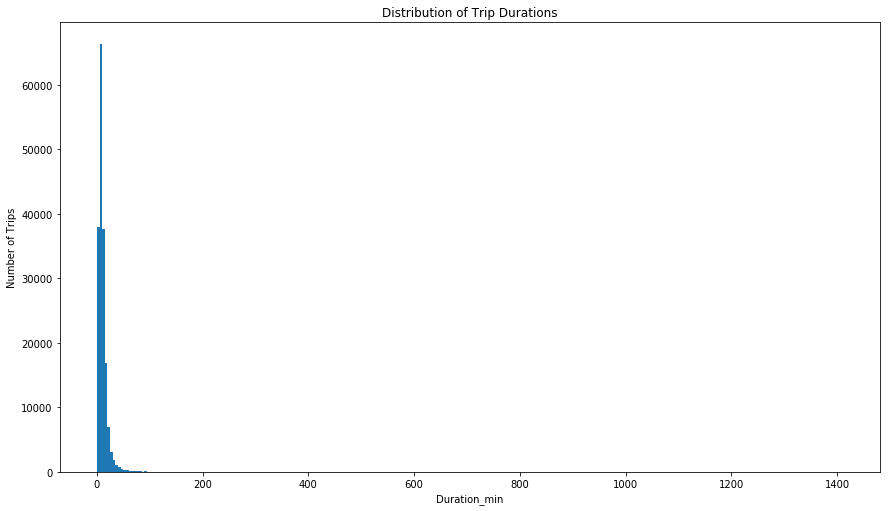

In [49]:
# plotting the duration_min data on a normal scale
binsize = 5
bins = np.arange(0, df['duration_min'].max()+binsize, binsize)

plt.figure(figsize=[14.70, 8.27])
plt.tight_layout()
plt.hist(data = df, x = 'duration_min', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_min')
plt.ylabel('Number of Trips')
plt.show()

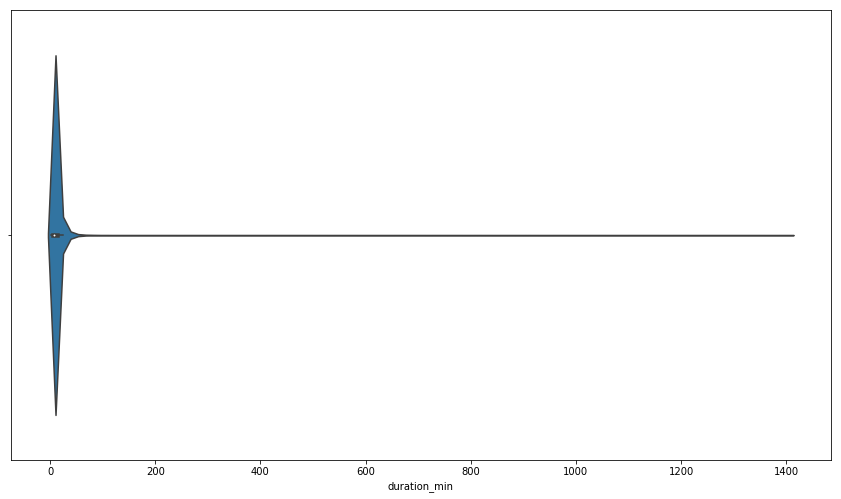

In [50]:
# using violinplot to have a second look at the distribution
plt.figure(figsize=[14.70, 8.27])
sns.violinplot(data = df, x = 'duration_min');

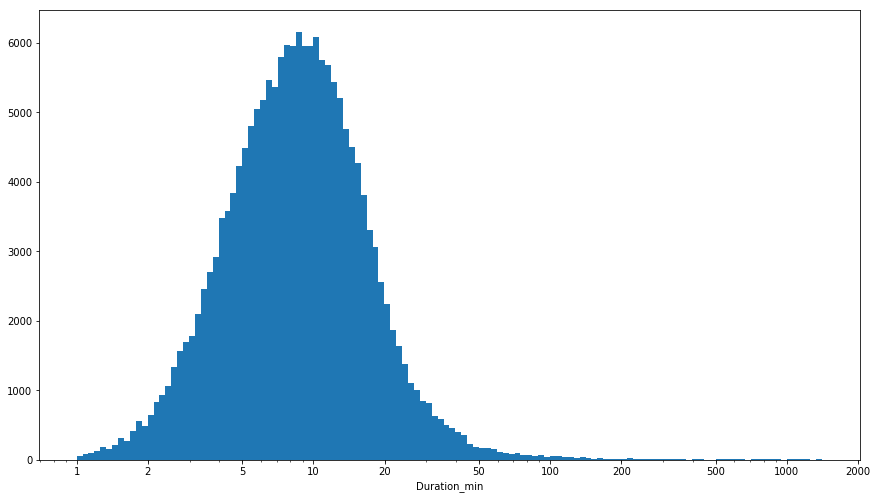

In [51]:
# Due to this long tail of the distribution, it's better to use the log scale to visulaize the duration_min.
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df['duration_min'].max())+log_binsize, log_binsize)

plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'duration_min', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000], [1, 2, 5, 10, 20, 50, 100, 200, 500, 1000, 2000]);
plt.xlabel('Duration_min');

> The longer the duration the shorter the number of trips

#### Let's check the start_time_hour data

In [52]:
base_color = sns.color_palette()[0]

In [53]:
hour_order = df['start_time_hour'].value_counts().index

* What's the distribution of the rides during the day?

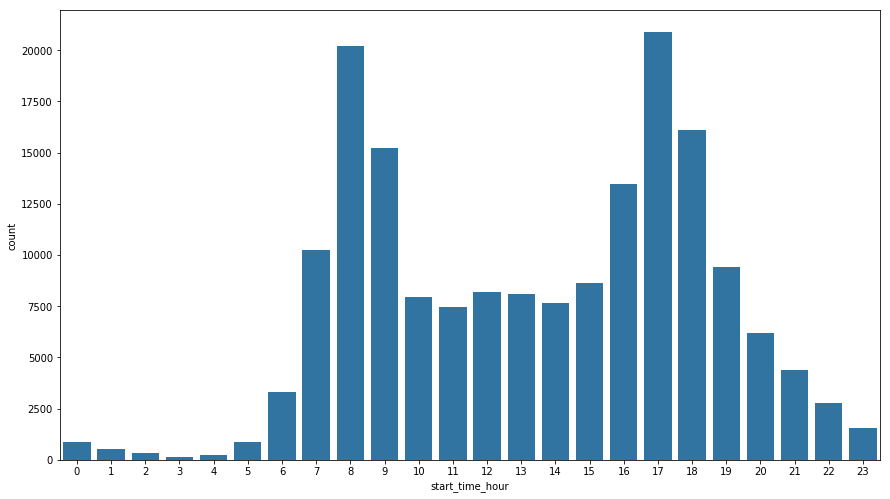

In [54]:
# distribution of rides during the day
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = df , x= 'start_time_hour', color = base_color);

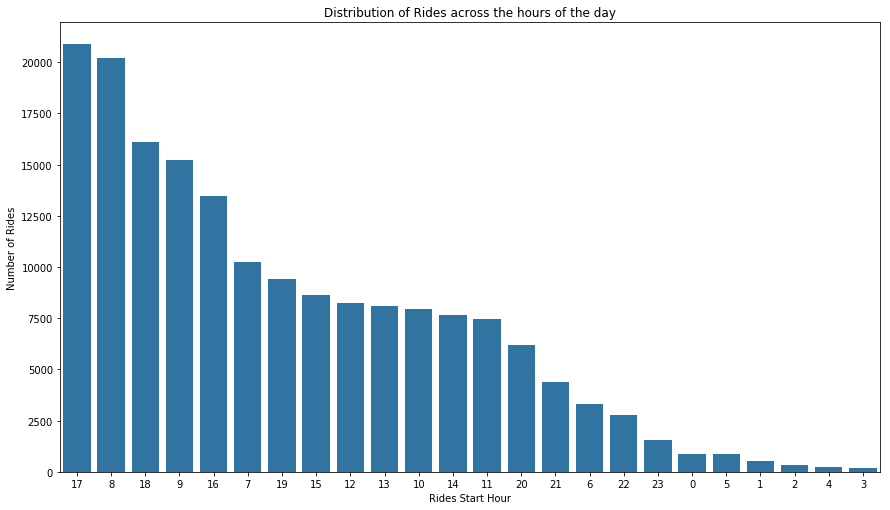

In [55]:
# in order
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = df , x= 'start_time_hour', color=base_color, order=hour_order)
plt.title('Distribution of Rides across the hours of the day')
plt.xlabel('Rides Start Hour')
plt.ylabel('Number of Rides')
plt.show()

> Peak hours for riding is 5 P.M (17:00) and 8 A.M (Those two hours are matching closely with the normal working hours for riders)

#### Let's know the day of the week with the most rides.

* What day of the week has the most rides?

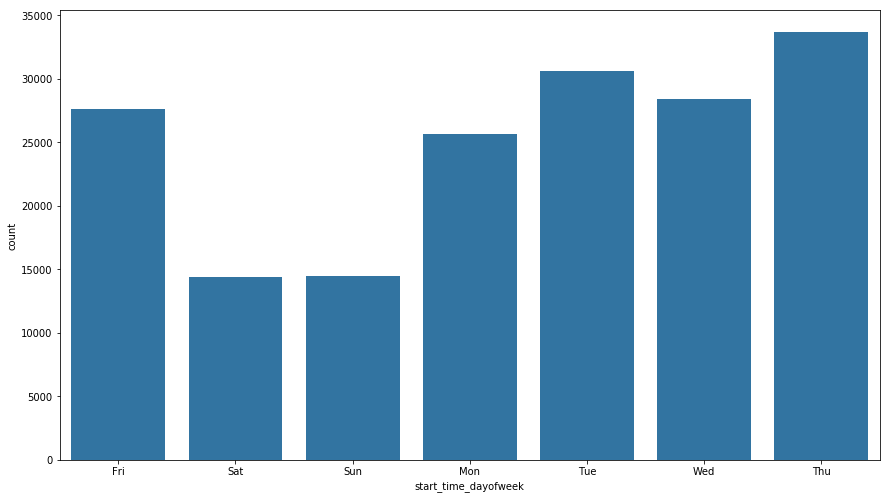

In [56]:
# day of the week with the most rides
plt.tight_layout()
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = df, x = 'start_time_dayofweek', color = base_color);

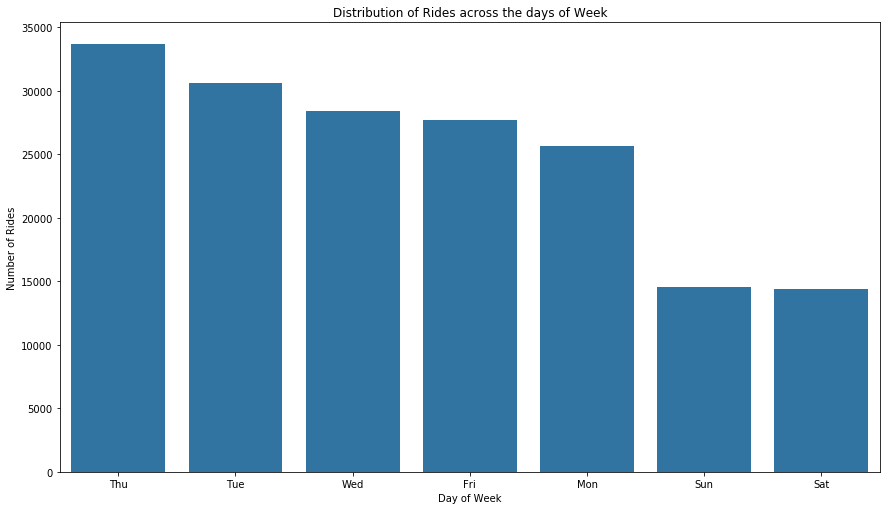

In [57]:
# in order
row_order = df['start_time_dayofweek'].value_counts().index
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = df, x = 'start_time_dayofweek', color = base_color, order = row_order);
plt.title('Distribution of Rides across the days of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.show()

> Apparently bikers have higher rides at weekdays more than weekends making Thursday the highest day of rides with the other workdays close to it.

#### The month with the most rides

* In what month were most of the rides taken?

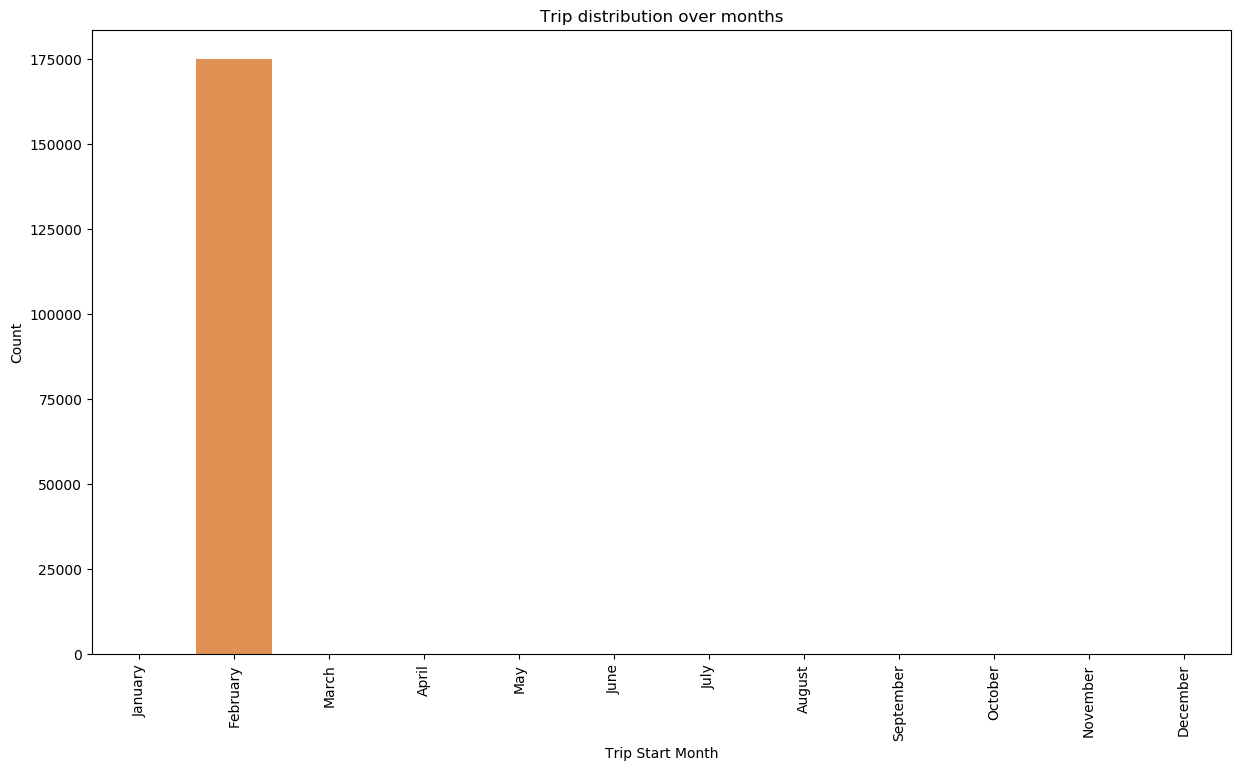

In [58]:
# trip distribution over months
plt.figure(figsize = (14.70,8.27), dpi = 100)

month = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_categ = pd.api.types.CategoricalDtype(ordered=True, categories=month)
df['start_time_month'] = df['start_time_month'].astype(month_categ)

sns.countplot(data=df, x='start_time_month')
plt.xticks(rotation=90)
plt.xlabel('Trip Start Month')
plt.ylabel('Count')

plt.title("Trip distribution over months")

plt.show()

> Apparently, all the trips took place in the month of February.

## Now Let's pay more attention to the bikers, their gender, age and user_type

## 1. Bikers' Gender

In [59]:
df['member_gender'].value_counts()

Male      130500
Female     40805
Other       3647
Name: member_gender, dtype: int64

* What gender rode bikes the most?

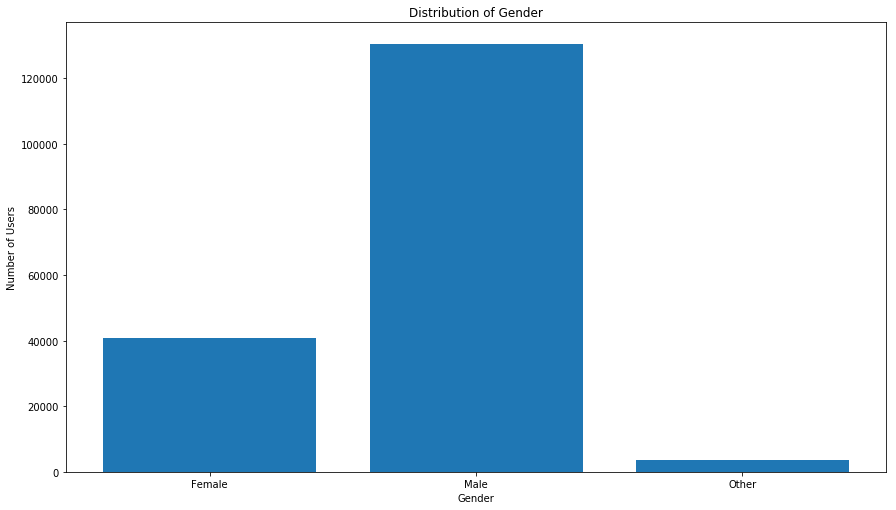

In [60]:
# distribution of genders by number of users
plt.tight_layout()
plt.figure(figsize=[14.70, 8.27])
plt.bar(x = df['member_gender'].value_counts().keys(), height = df['member_gender'].value_counts());
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Users')
plt.show();

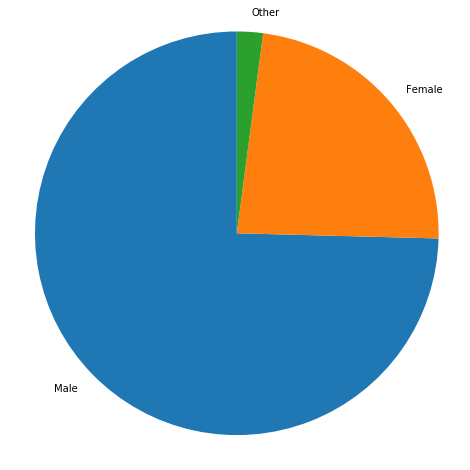

In [61]:
# Viewing the gender also on a pie chart
sorted_counts = df['member_gender'].value_counts()

plt.figure(figsize=[14.70, 8.27])

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90);

plt.axis('square');

Male      74.591888
Female    23.323540
Other      2.084572
Name: member_gender, dtype: float64


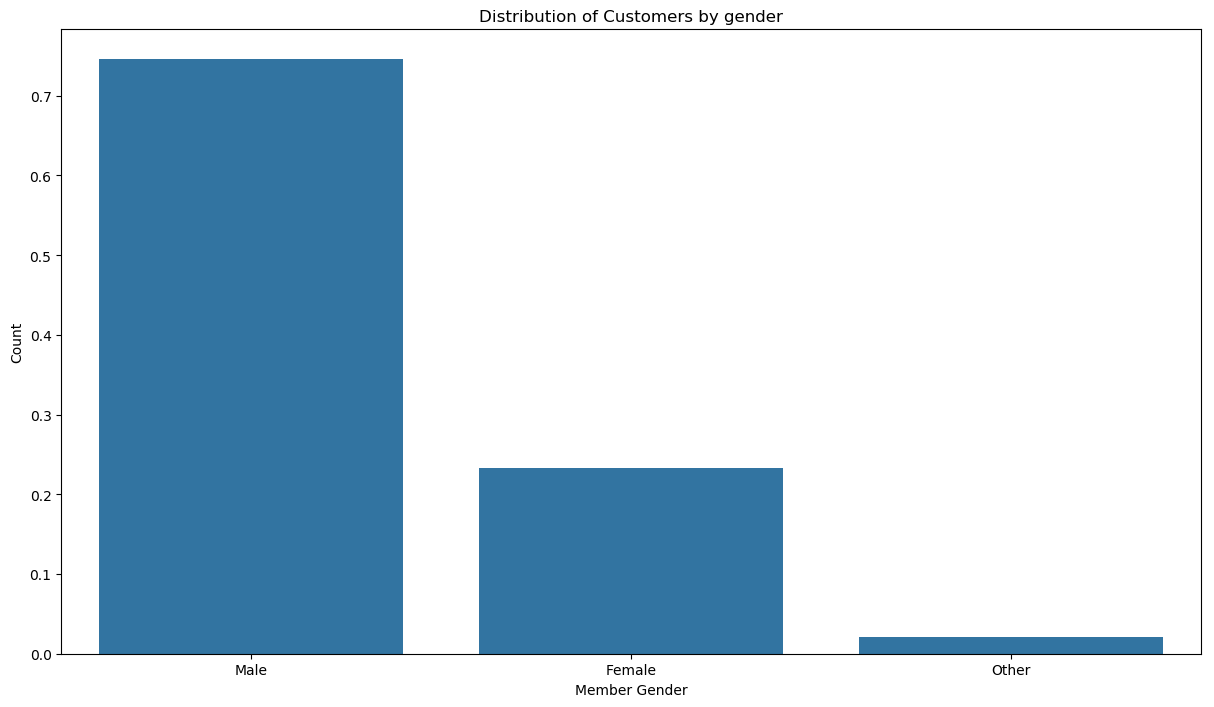

In [62]:
# Viewing the gender in percentage
plt.figure(figsize=[14.70, 8.27], dpi = 100)

counts = df['member_gender'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values, color=base_color)
plt.xlabel('Member Gender')
plt.ylabel('Count')
print(counts * 100)
plt.title("Distribution of Customers by gender")

plt.show()

> We can come to the conclusion that male bikers are more with the distribution at 74.59% while the female bikers are at 23.32% and others at 2.09%.

# 2. Bikers' Age

In [ ]:
df['member_age'].value_counts()

> Ages 141, 119, 118, 117 are almost impossible, so we're not sure if it's an outlier. Let's just keep that in mind as we go further

In [63]:
df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

* What age group are most active?

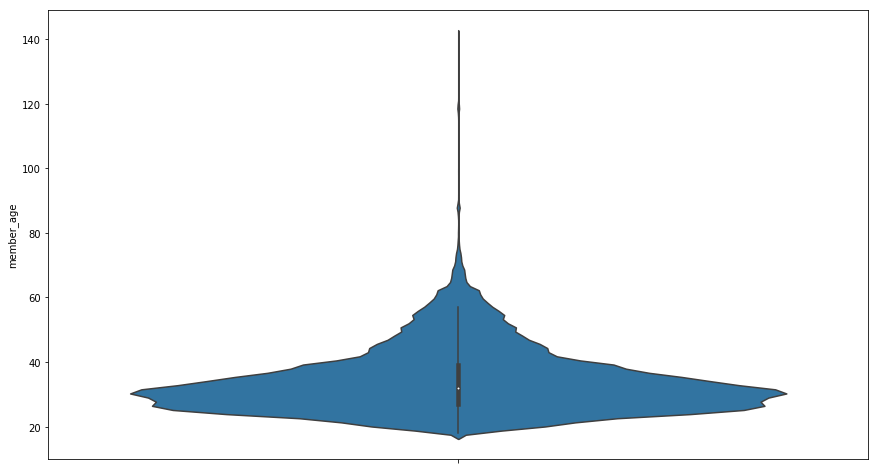

In [64]:
plt.figure(figsize=[14.70, 8.27])
sns.violinplot(data = df, y = 'member_age');

In [65]:
df['member_age'].describe()

count    174952.000000
mean         34.196865
std          10.118731
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

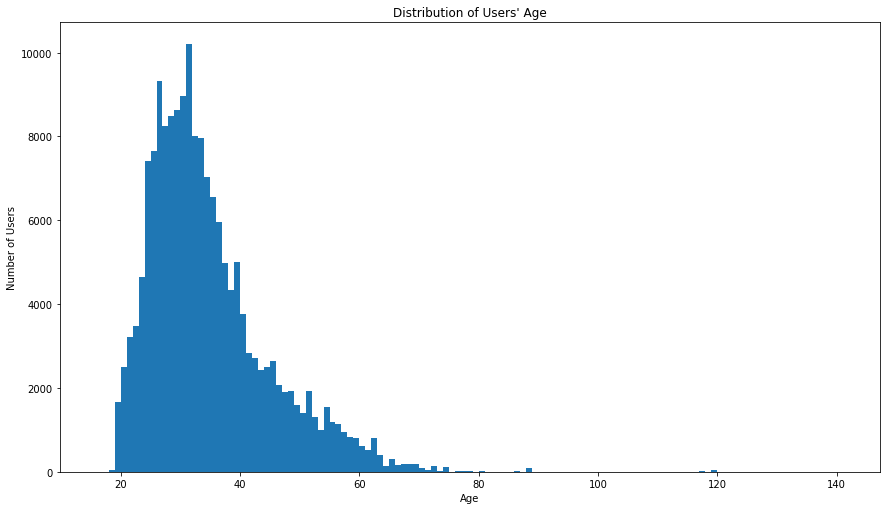

In [66]:
# distribution of users' age
binsize = 1
bins = np.arange(16, df['member_age'].max()+binsize, binsize)
plt.figure(figsize=[14.70, 8.27])
plt.hist(data = df, x = 'member_age', bins = bins);
plt.title("Distribution of Users' Age")
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

> Using this distribution, which is skewed to the right, one can conclude that the major age range of bikers which are 25-35 belongs to either the working class or students or one can easily say they are the most active set of the population.

# 3. Bikers Type

In [67]:
df['user_type'].value_counts()

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

* What is the distribution of the number of users by type?

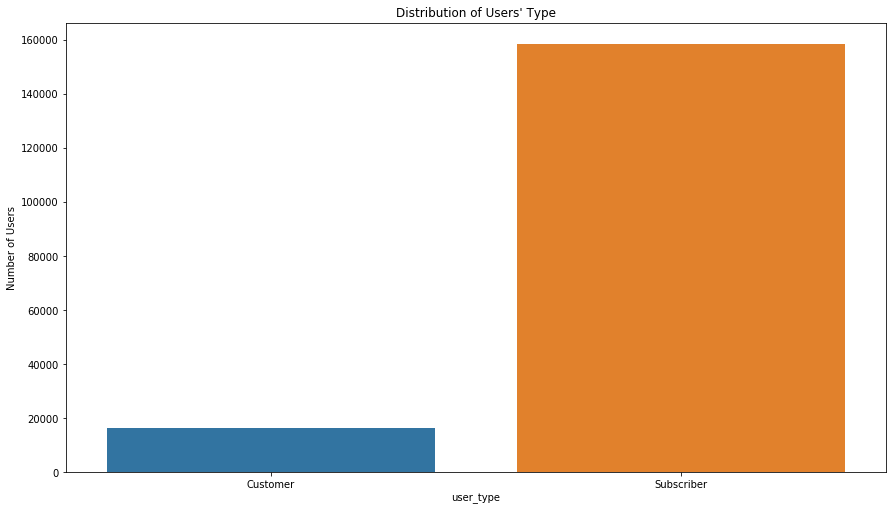

In [68]:
# distribution by type
plt.tight_layout()
plt.figure(figsize=[14.70, 8.27])
sns.countplot(data = df, x = 'user_type');
plt.title("Distribution of Users' Type")
plt.xlabel('user_type')
plt.ylabel('Number of Users')
plt.show();

Subscriber    90.531117
Customer       9.468883
Name: user_type, dtype: float64


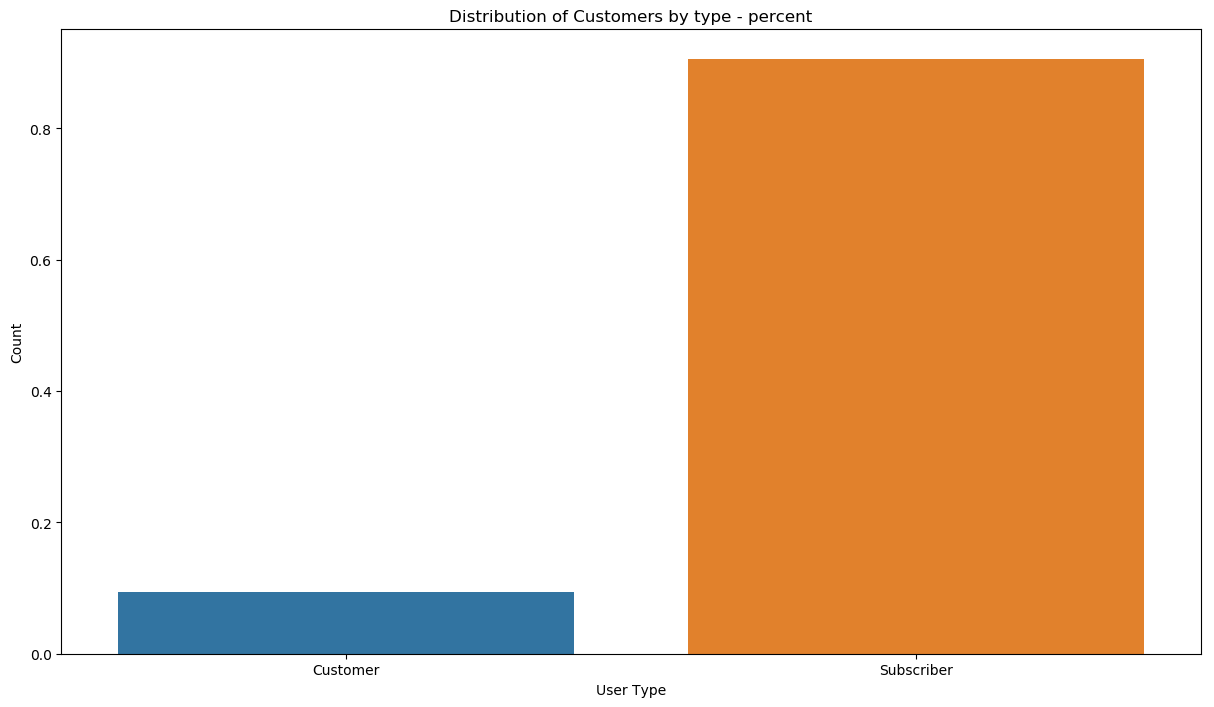

In [69]:
# distribution in percentage
plt.figure(figsize=[14.70, 8.27], dpi = 100)

counts = df['user_type'].value_counts(normalize = True)
sns.barplot(x = counts.index, y = counts.values)
plt.xlabel('User Type')
plt.ylabel('Count')
print(counts * 100)

plt.title("Distribution of Customers by type - percent")
plt.show()

> Apparently, the subscribers are more than 9 times the customers and that shows a long term relationship and satisfaction from the users with the services provided to them.

##### Removing Outliers

In [70]:
# going further, using the duration not more than 60 mins and members' age not more than 80 years
df_1 = df[df["duration_min"] <= 60]
df_2 = df_1[df["member_age"] <= 80]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
df_2.sample(20)

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_month,end_time_dayofweek,end_time_month,duration_min,start_time_hour,member_age
123820,2019-02-11 09:01:02.447,2019-02-11 09:09:18.340,81,Berry St at 4th St,37.775880,-122.393170,16,Steuart St at Market St,37.794130,-122.394430,...,1982,Male,False,Mon,February,Mon,February,8.250000,9,37
49494,2019-02-21 21:28:54.770,2019-02-21 21:35:23.740,171,Rockridge BART Station,37.844279,-122.251900,18,Telegraph Ave at Alcatraz Ave,37.850222,-122.260172,...,1972,Female,False,Thu,February,Thu,February,6.466667,21,47
41001,2019-02-22 19:10:56.425,2019-02-22 19:20:37.116,24,Spear St at Folsom St,37.789677,-122.390428,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,...,1978,Male,False,Fri,February,Fri,February,9.666667,19,41
168763,2019-02-04 13:40:36.695,2019-02-04 13:44:02.445,151,53rd St at Hollis St,37.836182,-122.287180,148,Horton St at 40th St,37.829705,-122.287610,...,1984,Male,False,Mon,February,Mon,February,3.416667,13,35
51371,2019-02-21 17:59:29.920,2019-02-21 18:14:08.737,324,Union Square (Powell St at Post St),37.788300,-122.408531,54,Alamo Square (Steiner St at Fulton St),37.777547,-122.433274,...,1989,Male,False,Thu,February,Thu,February,14.633333,17,30
156330,2019-02-06 08:01:11.084,2019-02-06 08:10:52.963,67,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,44,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,...,1973,Male,False,Wed,February,Wed,February,9.683333,8,46
157632,2019-02-05 21:12:52.602,2019-02-05 21:18:33.217,109,17th St at Valencia St,37.763316,-122.421904,133,Valencia St at 22nd St,37.755213,-122.420975,...,1985,Female,False,Tue,February,Tue,February,5.666667,21,34
1806,2019-02-28 18:34:20.938,2019-02-28 18:48:56.253,81,Berry St at 4th St,37.775880,-122.393170,87,Folsom St at 13th St,37.769757,-122.415674,...,1982,Male,False,Thu,February,Thu,February,14.583333,18,37
115893,2019-02-12 08:08:59.734,2019-02-12 08:27:03.211,373,Potrero del Sol Park (25th St at Utah St),37.751792,-122.405216,28,The Embarcadero at Bryant St,37.787168,-122.388098,...,1991,Male,False,Tue,February,Tue,February,18.050000,8,28
27996,2019-02-25 08:51:12.503,2019-02-25 09:10:10.317,137,Jersey St at Castro St,37.750506,-122.433950,349,Howard St at Mary St,37.781010,-122.405666,...,1989,Female,False,Mon,February,Mon,February,18.950000,8,30


In [73]:
df_2["member_age"].describe()

count    173374.000000
mean         34.119389
std           9.873882
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max          80.000000
Name: member_age, dtype: float64

In [74]:
df_2["duration_min"].describe()

count    173374.000000
mean         10.311936
std           7.396501
min           1.016667
25%           5.366667
50%           8.450000
75%          13.000000
max          59.933333
Name: duration_min, dtype: float64

### Distribution(s) of your variable(s) of interest.

1. The feature of interest was the trip duration, and we can conclude that the users used the biking system for a wide range of trip duration, and after cleaning the trip duration data and removing the outliers, we have found that the major trips had a trip duration on average of 7-12 mins.

2. The duration_min data were not showing a proper distribution while plotting them on a linear scale, hence the logarithmic scale in order to show proper distribution.

3. I found that the work days were the most days that the users use the bike share system especially Thursdays for this study.

4. I also found that the peak hours for the users were from 7-9am and from 4-6pm and the hours are closely matching with the regular start and end working hours. This might be related to the time when employees and students go to and leave work and school. This is was also consistent with the distribution of trips over weekdays, where work days have the most demand for trips.
5. Regarding the users, the males were almost 3 times the female users, the most age range is 20-40 which belonged to the most active population either at work or studying.  the subscribers are more than 9 times the customers. Customers represent 9.35% of users, whereas subscribers represents 90.65%. Males represent 74.62% of users, whereas Females represents 23.30%, the remainder is others with 2.07%




### Unusual distributions

1. The trip duration was initially at seconds but I had them converted to minutes for easy analysis. The duration_min distribution had outliers so I also had them removed based on 120 mins as a cut point after studying the effect of these cut data on the whole datset.

2. The hour of the day and the day of the week were extracted from the timestamp.

3. The age of the users is calculated using the member_birth_year.

4. New features were created out of the time variable

### Saving the cleaned Dataset

In [75]:
# Before moving to the next exploration, save the cleaned dataset on a new csv file.
df_2.to_csv('clean_2019fordgobike.csv', index=False)

In [76]:
# to confirm it the cleaned dataset was saved
df_2.head()

,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,...,member_birth_year,member_gender,bike_share_for_all_trip,start_time_dayofweek,start_time_month,end_time_dayofweek,end_time_month,duration_min,start_time_hour,member_age
4,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,...,1974,Male,True,Thu,February,Fri,March,26.416667,23,45
5,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,...,1959,Male,False,Thu,February,Fri,March,29.883333,23,60
6,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300,Palm St at Willow St,37.317298,-121.884995,312,San Jose Diridon Station,37.329732,-121.901782,...,1983,Female,False,Thu,February,Fri,March,19.116667,23,36
7,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,...,1989,Male,False,Thu,February,Fri,March,26.916667,23,30
8,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,10,Washington St at Kearny St,37.795393,-122.404770,127,Valencia St at 21st St,37.756708,-122.421025,...,1988,Other,False,Thu,February,Fri,March,26.166667,23,31


## Bivariate Exploration

> In this section, we'll investigate relationships between pairs of variables in the
data.

##### Distribution of duration by members' age

* What is the relationship between the trip duration and age?

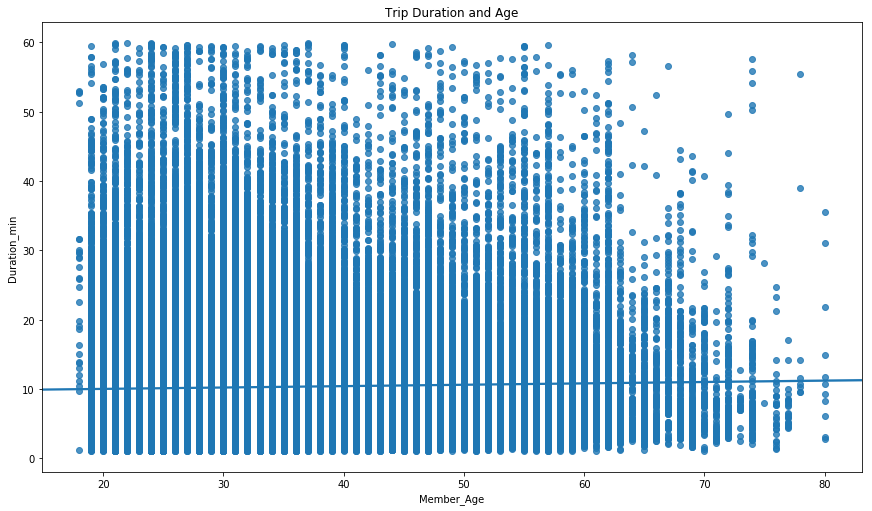

In [77]:
plt.figure(figsize=[14.70, 8.27])
sns.regplot(data = df_2, x = 'member_age', y = 'duration_min');
plt.title('Trip Duration and Age')
plt.xlabel('Member_Age')
plt.ylabel('Duration_min')
plt.show()

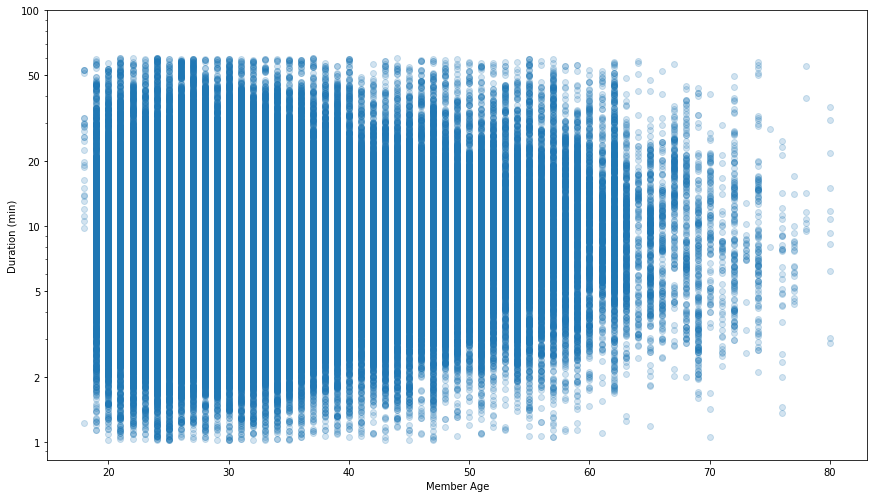

In [78]:
# scatter plot of duration_min vs. member_age, with log transform on duration_min axis
plt.figure(figsize=[14.70, 8.27])
plt.scatter(data = df_2, x = 'member_age', y = 'duration_min', alpha = 0.2);

# plt.xlim([0, 3.5])
plt.xlabel('Member Age');
plt.yscale('log');
plt.yticks([1, 2, 5, 10, 20, 50, 100], [1, 2, 5, 10, 20, 50, 100]);
plt.ylabel('Duration (min)');

> A negative correlation occurred between trip duration and age

##### Distribution by members' gender

* What is the relationship between the trip duration and gender? 

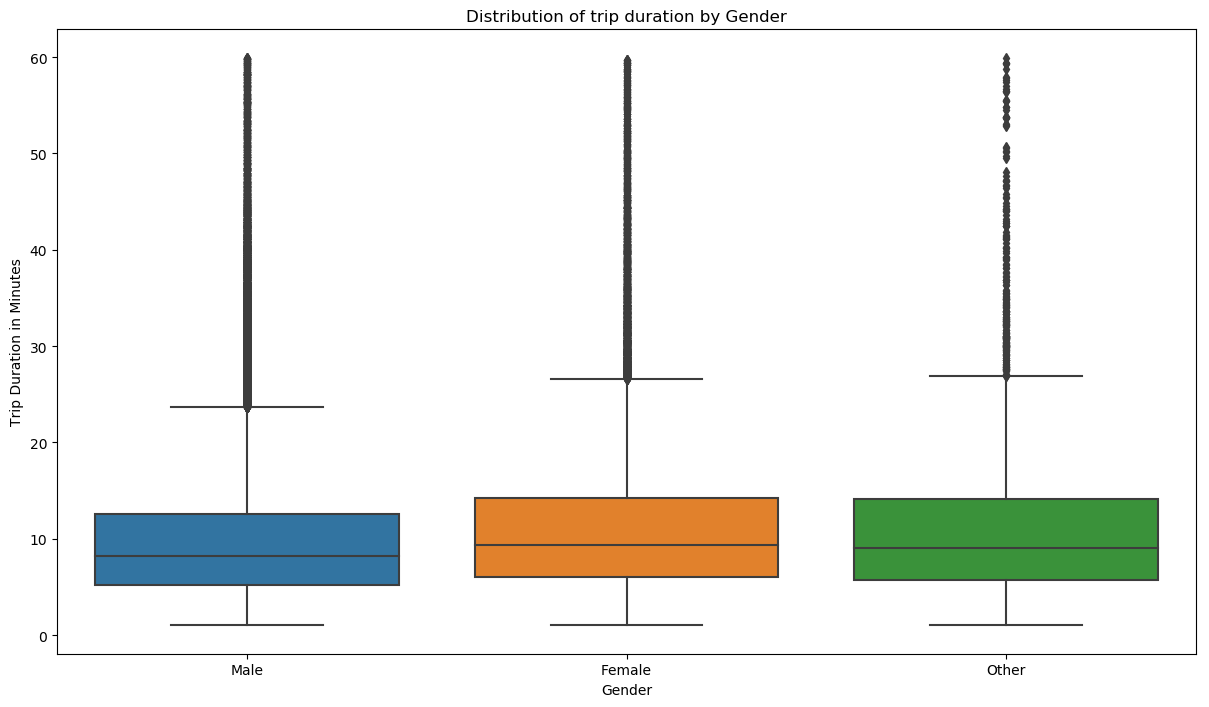

In [79]:
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.boxplot(data = df_2, x = "member_gender", y = "duration_min")
plt.xlabel('Gender');
plt.ylabel('Trip Duration in Minutes')

plt.title("Distribution of trip duration by Gender")

plt.show()

> Male riders have shorter trips compared to female riders and other gender types.

##### Distribution by user type

* What is the relationship between trip durations and user type?

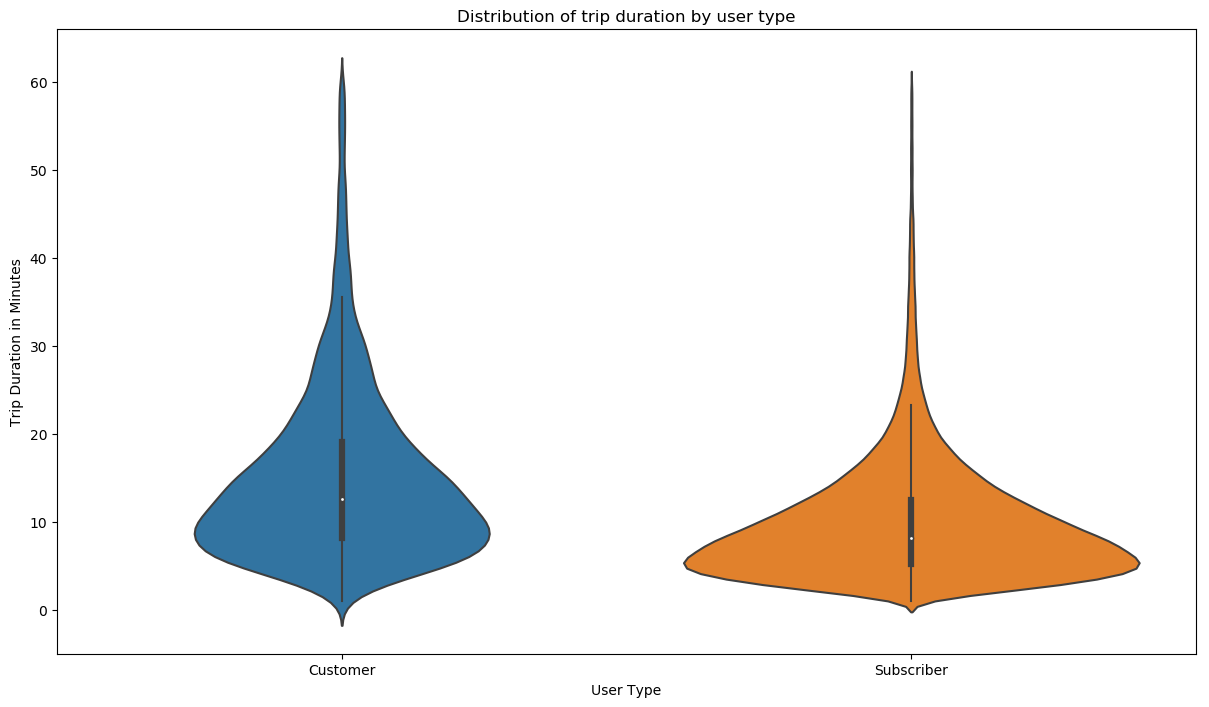

In [80]:
# using a violin plot to show the relationship
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.violinplot(data = df_2, x = "user_type", y = "duration_min")
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minutes')

plt.title("Distribution of trip duration by user type")

plt.show()

> From the above graph customers have longer trips while subscribers have shorter trips.

##### Distribution by start time day of the week

* How do different days of the week affect the duration of the trips?

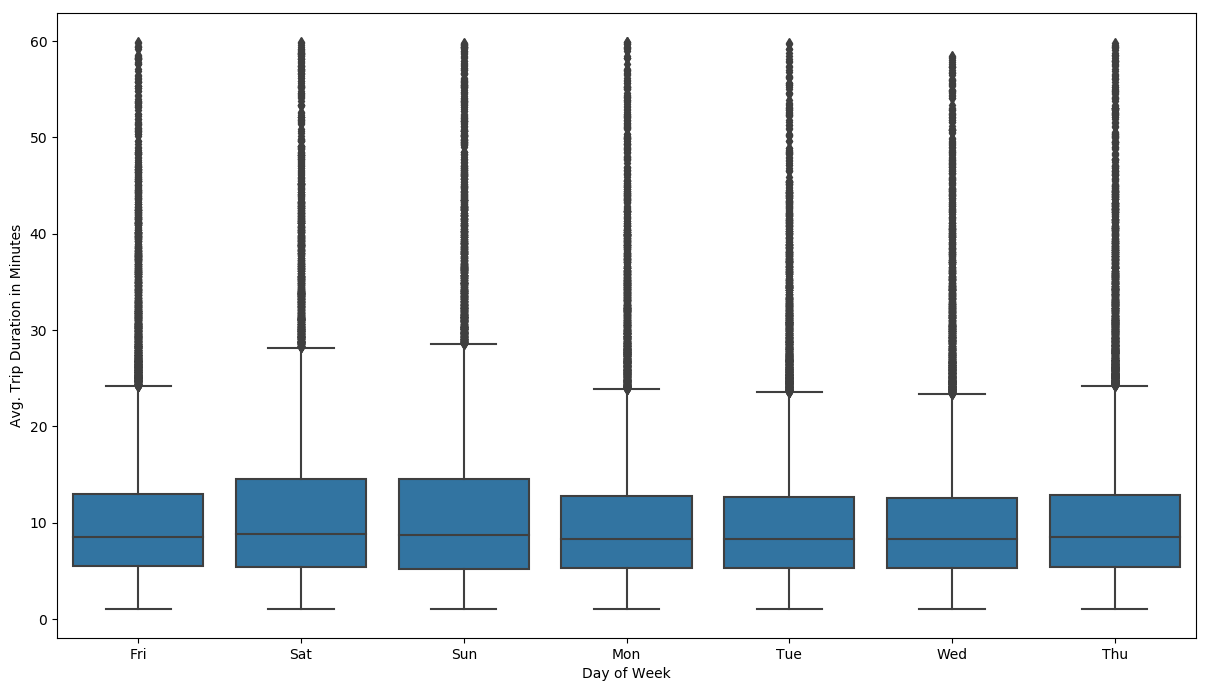

In [81]:
# using a barplot
plt.tight_layout()
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.boxplot(data = df_2, x = "start_time_dayofweek", y = "duration_min", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minutes')

plt.show();

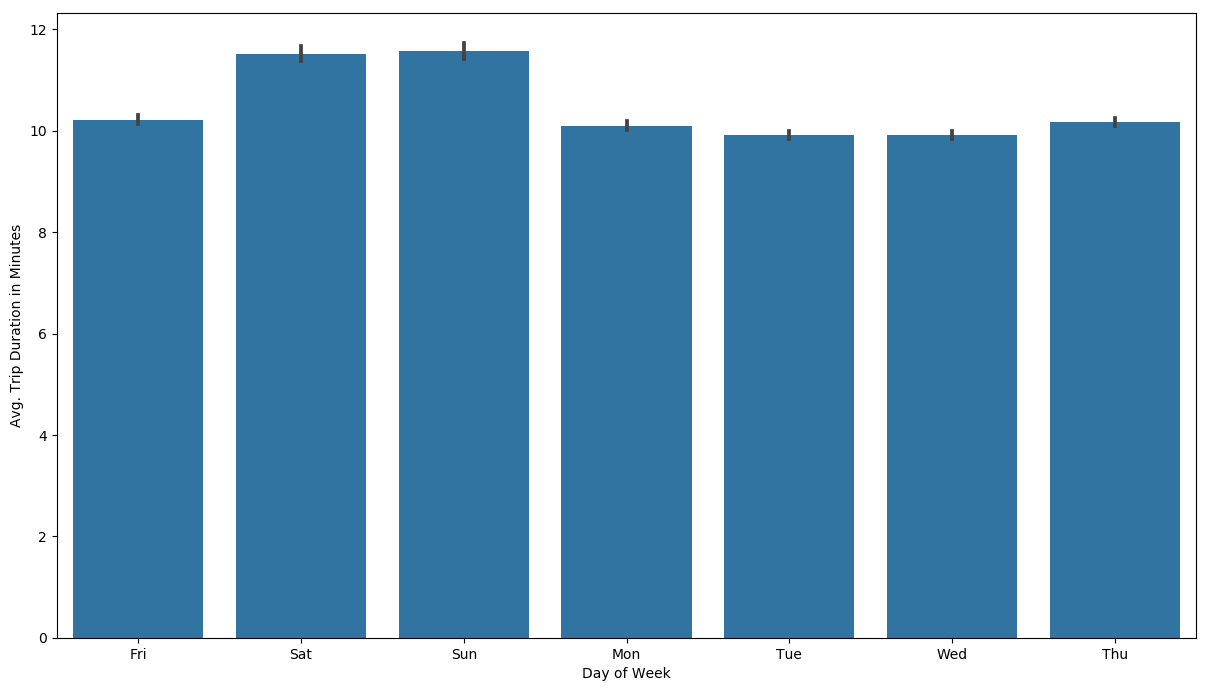

In [82]:
# using a barplot
plt.tight_layout()
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.barplot(data = df_2, x = "start_time_dayofweek", y = "duration_min", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minutes')

plt.show();

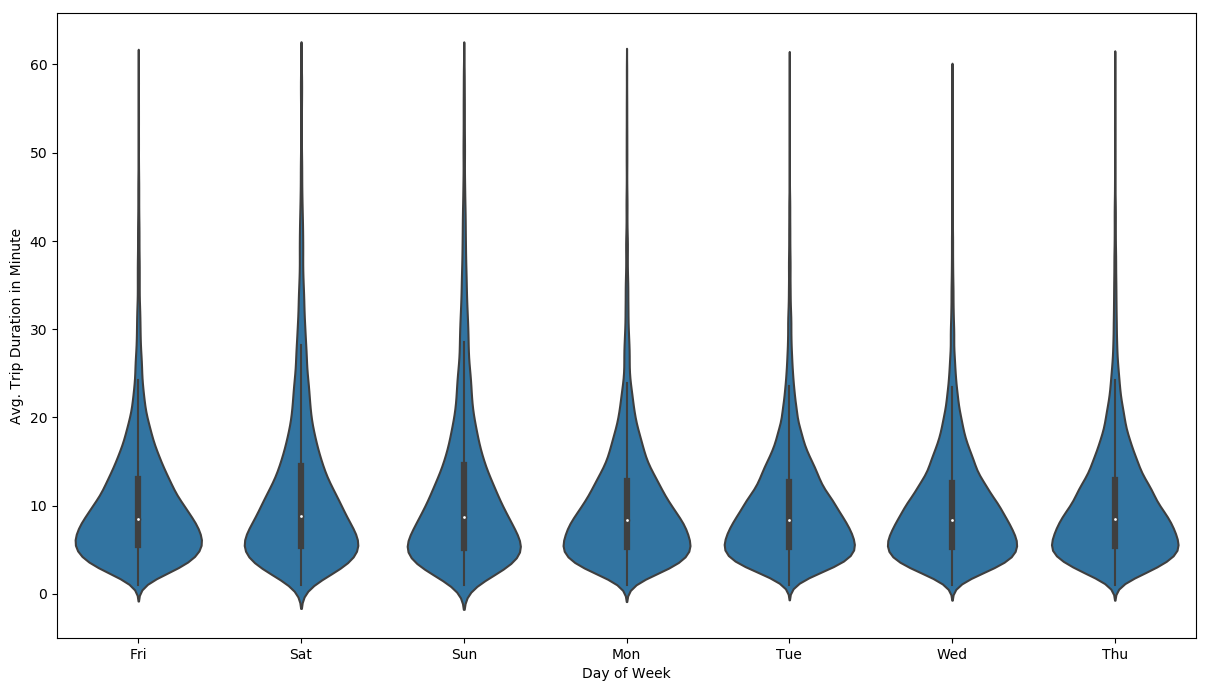

In [83]:
# using a violinplot
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.violinplot(data = df_2, x = "start_time_dayofweek", y = "duration_min", color=base_color)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')

plt.show()

> Trips are longer during weekends (Saturdays and Sundays). One can say the trips are mostly taken for fun during weekends.

##### Distribution by user type over weekdays

* How do the different user types use the bike system during weeekdays?

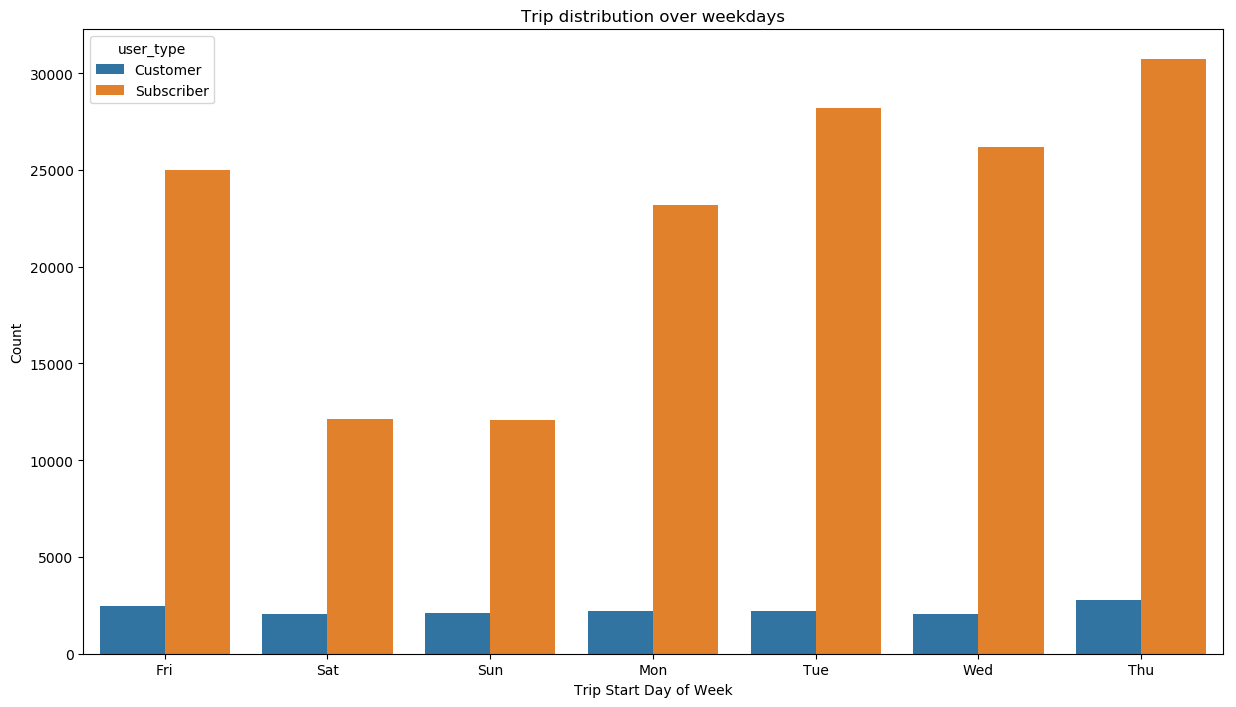

In [84]:
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.countplot(data=df_2, x='start_time_dayofweek', hue='user_type')
plt.xlabel('Trip Start Day of Week')
plt.ylabel('Count')
plt.title("Trip distribution over weekdays")

plt.show()

> Subscribers tend to have consistent usage for a specific purpose every day, mainly: work and study. As a result the number of their rides declines the most at weekends

##### Distribution by user type over hours of the day

* How do user types use the bike system at different hours of each day?

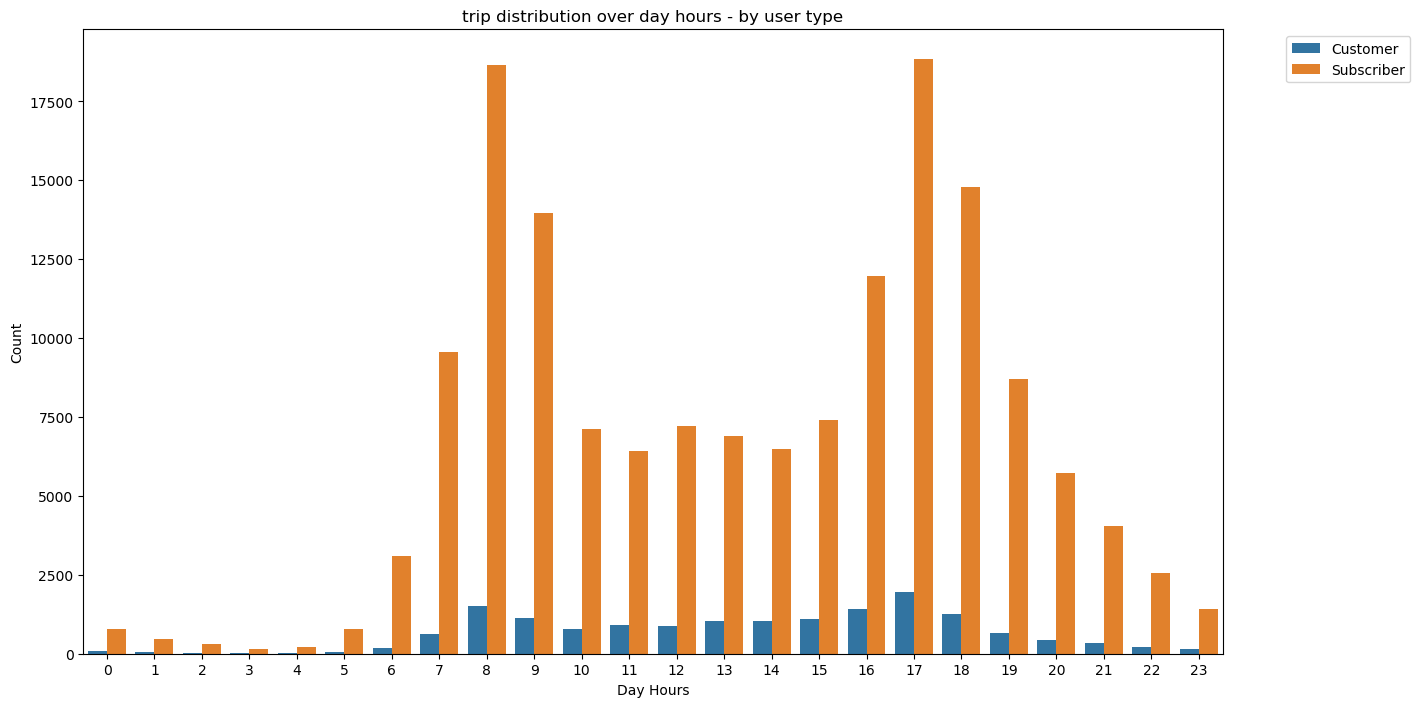

In [85]:
plt.figure(figsize=[14.70, 8.27], dpi = 100)

sns.countplot(data = df_2, x = "start_time_hour", hue='user_type')
plt.title("trip distribution over day hours - by user type")
plt.xlabel('Day Hours')
plt.ylabel('Count')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

> We can notice that peak hours for both user types are those from 7 - 9 am which might be when workers and students go to work/school and from 4 - 6 pm when they leave work/school.

### How did the feature(s) of interest vary with other features in the dataset?

* As mentioned earlier, the main focus of interest of this study is the trip timing, so I have studied the trip duration with the member age, and also I have studied the the rush hour usage across the day for both user types; the subscriber and the customer.



### Interesting relationships between other features

1. Yes I have observed interesting relationships, for the duration_min vs the member age, I have concluded that from age 20 to 40, the duration of major trips was ranging between 2 mins to 30 mins and the trip duration range is narrowing as the age increased, this is obviously described with the duration_min vs age on the log scale as it looks like a horizontal cone which tends to narrow as the age of the member increased.

2. For the rush hour of the of the day vs the user type, I have found that the rush hours for both user types are 5 P.M and 8 A.M and those two rush hours are matching with the rush hours of whole dataset which was investigated at the univariate visualization earlier but obviously the number of trips for subscriber users at those two hours are larger than same two hours for the customer users.

3. There are way more subscribers than customers. Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. Therfore subscribers usage reaches its highest levels during rush hours and work days. Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekends at midnights and middays

## Multivariate Exploration

* What's the distribution over user type and age, trip durations, weekdays?

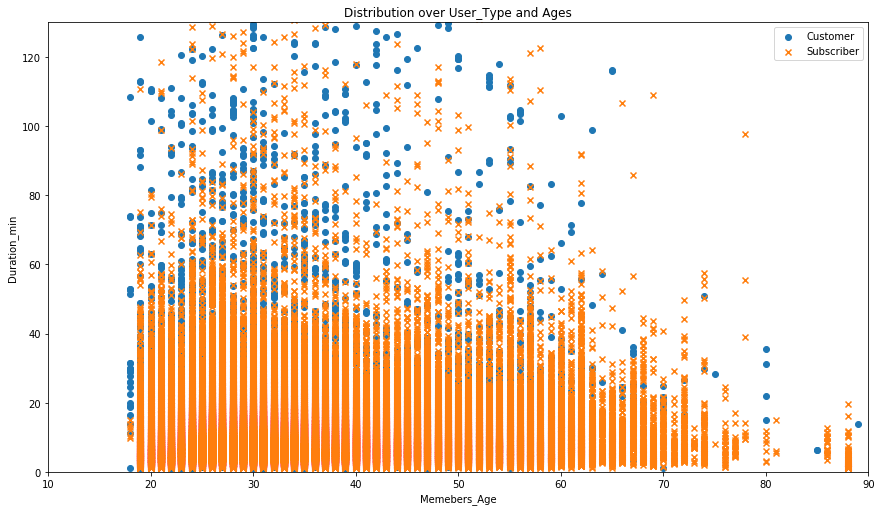

In [86]:
# distribution over user types and age
plt.figure(figsize=[14.70, 8.27])
usertype_markers = [['Customer', 'o'],
                    ['Subscriber', 'x']]


for user_type, marker in usertype_markers:
    df_usertype = df[df['user_type'] == user_type]
    plt.scatter(df_usertype['member_age'], df_usertype['duration_min'], marker = marker)
plt.legend(['Customer', 'Subscriber'])
plt.axis([10, 90, 0, 130 ])
plt.title('Distribution over User_Type and Ages')
plt.xlabel('Memebers_Age')
plt.ylabel('Duration_min')
plt.show()

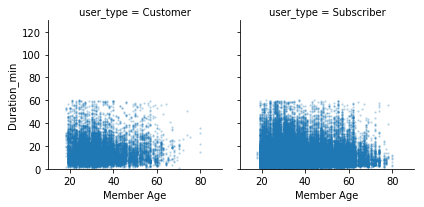

In [87]:
# trip duration over different user types and members' age
user_type = sns.FacetGrid(data = df_2, col = 'user_type', col_wrap = 2, xlim = [10, 90], ylim = [0, 130])
user_type.map(plt.scatter, 'member_age', 'duration_min', alpha= 0.2, s=2)

user_type.set_xlabels('Member Age')
user_type.set_ylabels('Duration_min')

plt.show()

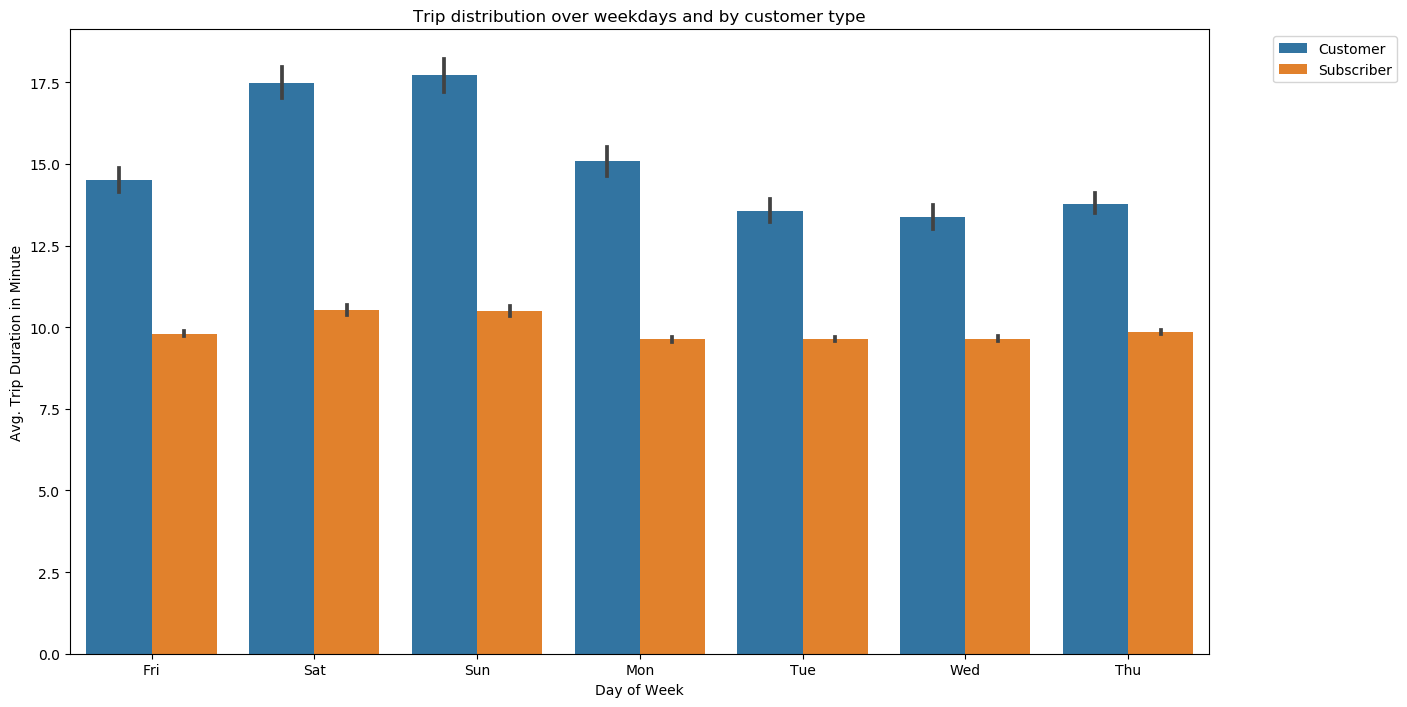

In [88]:
# distribution over weekdays by customer types
plt.figure(figsize = (14.70, 8.27), dpi = 100)

sns.barplot(data = df_2, x = "start_time_dayofweek", y = "duration_min", hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Minute')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Trip distribution over weekdays and by customer type")

plt.show()

 > Customers have longer trips than subscribers

* What user type have longer trips and at what time of the day?

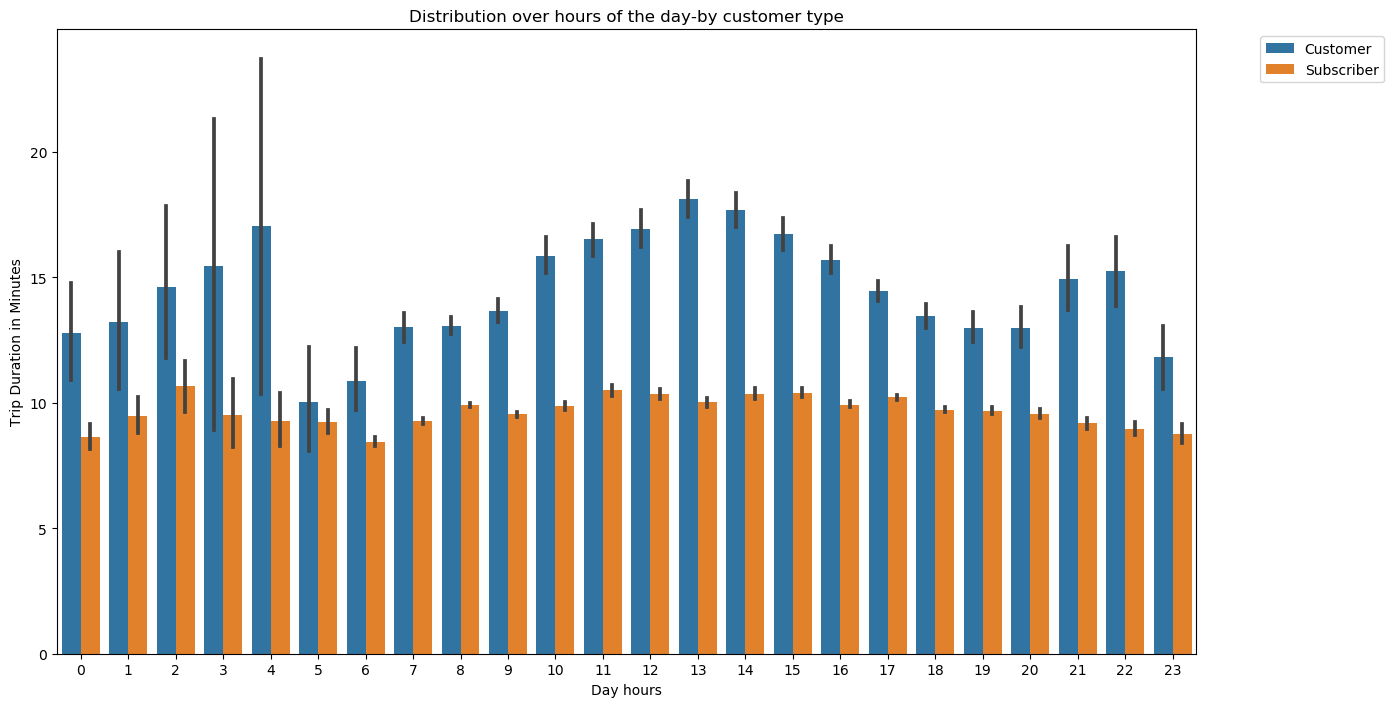

In [89]:
# distribution over hours of the day-by customer types
plt.figure(figsize = (14.70, 8.27), dpi = 100)

sns.barplot(data = df_2, x = "start_time_hour", y = "duration_min",   hue='user_type')
plt.title("Distribution over hours of the day-by customer type")
plt.xlabel('Day hours')
plt.ylabel('Trip Duration in Minutes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show();

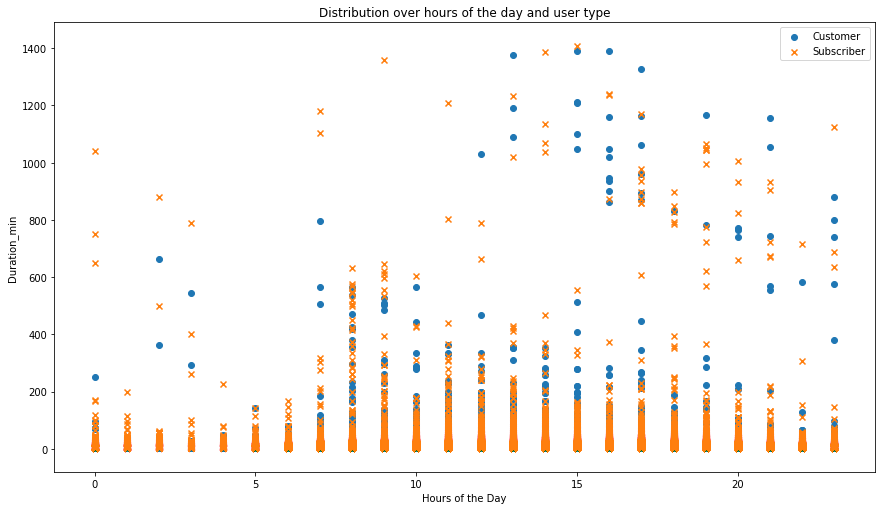

In [90]:
# further insight
# distribution over hours of the day-by user types
plt.figure(figsize=[14.70, 8.27])
usertype_markers = [['Customer', 'o'],
                    ['Subscriber', 'x']]


for user_type, marker in usertype_markers:
    df_usertype = df[df['user_type'] == user_type]
    plt.scatter(df_usertype['start_time_hour'], df_usertype['duration_min'], marker = marker, alpha= 1)
plt.legend(['Customer', 'Subscriber'])
plt.title('Distribution over hours of the day and user type')
plt.xlabel('Hours of the Day')
plt.ylabel('Duration_min')
plt.show()

> Customers have consistently longer trips across all hours of the day. However, customer trips are much longer at midnight and midday

In [ ]:
# a PairGrid
plt.figure(figsize = (14.70, 8.27), dpi = 100)
g = sns.PairGrid(data = df_2, vars = ['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 
                                      'end_station_longitude', 'member_birth_year', 'bike_share_for_all_trip', 
                                      'duration_min', 'start_time_hour', 'member_age'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

> There is a clear different usage pattern between customers and subscribers in the way we previously explained

### Relationships observed in this part of the investigation.

* We have concluded earlier that the number of subscriber is 9-10 times the number of customers as a count but in this analysis we have found an interesting results that the subscribers users have higher age range than the customers users.

* Customers have consistently longer trips than subscribers across all hours of the day and are much longer at midnight and midday.

### Interesting or surprising interactions between features

* The interesting result shown by the plot is that the subscribers are using the bikeshare system for longer duration and also covering higher age range which is an indication of long relationship between the clients and the bikeshare company.

* It was surprising to see that customer's rides mostly occur during midnight and midday.

## Summary

DATASET

The dataset that I used was the Ford GoBike System Data. There are 183412 entries rows in the dataset with 16 columns. The features included are: trip duration(in sec), start_time, end_time, station informations(start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude and end_station_longitude), informations on members(bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).


FINDINGS

Univariate Analysis

* The users used the biking system for a wide range of trip duration, and after cleaning the trip duration data and removing the outliers, we have found that the major trips had a trip duration on average of 7-12 mins.

* The duration_min data were not showing a proper distribution while plotting them on a linear scale, hence the logarithmic scale in order to show proper distribution.

* The work days were the most days that the users use the bike share system especially Thursdays for this study.

* The peak hours for the users were from 7-9am and from 4-6pm and the hours are closely matching with the regular start and end working hours. This might be related to the time when employees and students go to and leave work and school. This is was also consistent with the distribution of trips over weekdays, where work days have the most demand for trips.

* The males were almost 3 times the female users, the most age range is 20-40 which belonged to the most active population either at work or studying. the subscribers are more than 9 times the customers. Customers represent 9.35% of users, whereas subscribers represents 90.65%. Males represent 74.62% of users, whereas Females represents 23.30%, the remainder is others with 2.07%

Bivariate Analysis
* For the duration_min vs the member age, from age 20 to 40, the duration of major trips was ranging between 2 mins to 30 mins and the trip duration range is narrowing as the age increased, this is obviously described with the duration_min vs age on the log scale as it looks like a horizontal cone which tends to narrow as the age of the member increased.

* For the rush hour of the of the day vs the user type, the rush hours for both user types are 5 P.M and 8 A.M and those two rush hours are matching with the rush hours of whole dataset which was investigated at the univariate visualization earlier but obviously the number of trips for subscriber users at those two hours are larger than same two hours for the customer users.

* There are way more subscribers than customers. Subscribers usage seem to be very consistent and standard, their usage is intended for daily routine such as work or study. Therfore subscribers usage reaches its highest levels during rush hours and work days. Customers on the other hand tend to use bikes for fun, their usage is concentrated during weekends at midnights and middays

Multivariate Analysis
* The subscribers have been using the bikeshare system for longer duration and also covering higher age range which is an indication of long relationship between the clients and the bikeshare company.